In [1]:
import lzma

In [2]:
import dill as pickle
import numpy as np
from corner import corner

In [3]:
import elm

Using database version X4-2024-12-31 located in: /mnt/home/beyerkyl/x4db/unpack_exfor-2024/X4-2024-12-31


In [4]:
with lzma.open("./walker.xz") as f:
    walker = pickle.load(f)

In [5]:
results = np.load("../../t2/og_cal/result.npz")

In [6]:
n_chains, n_steps, n_params = results["model_chains"].shape
(n_chains, n_steps, n_params)

(64, 10000, 14)

In [7]:
steps_to_burn = 8000

In [8]:
x = results["model_chains"][:,steps_to_burn:,:].reshape((n_chains*(n_steps - steps_to_burn), n_params))

In [9]:
idxs = np.random.choice( np.arange(n_chains*(n_steps - steps_to_burn)), 10000)

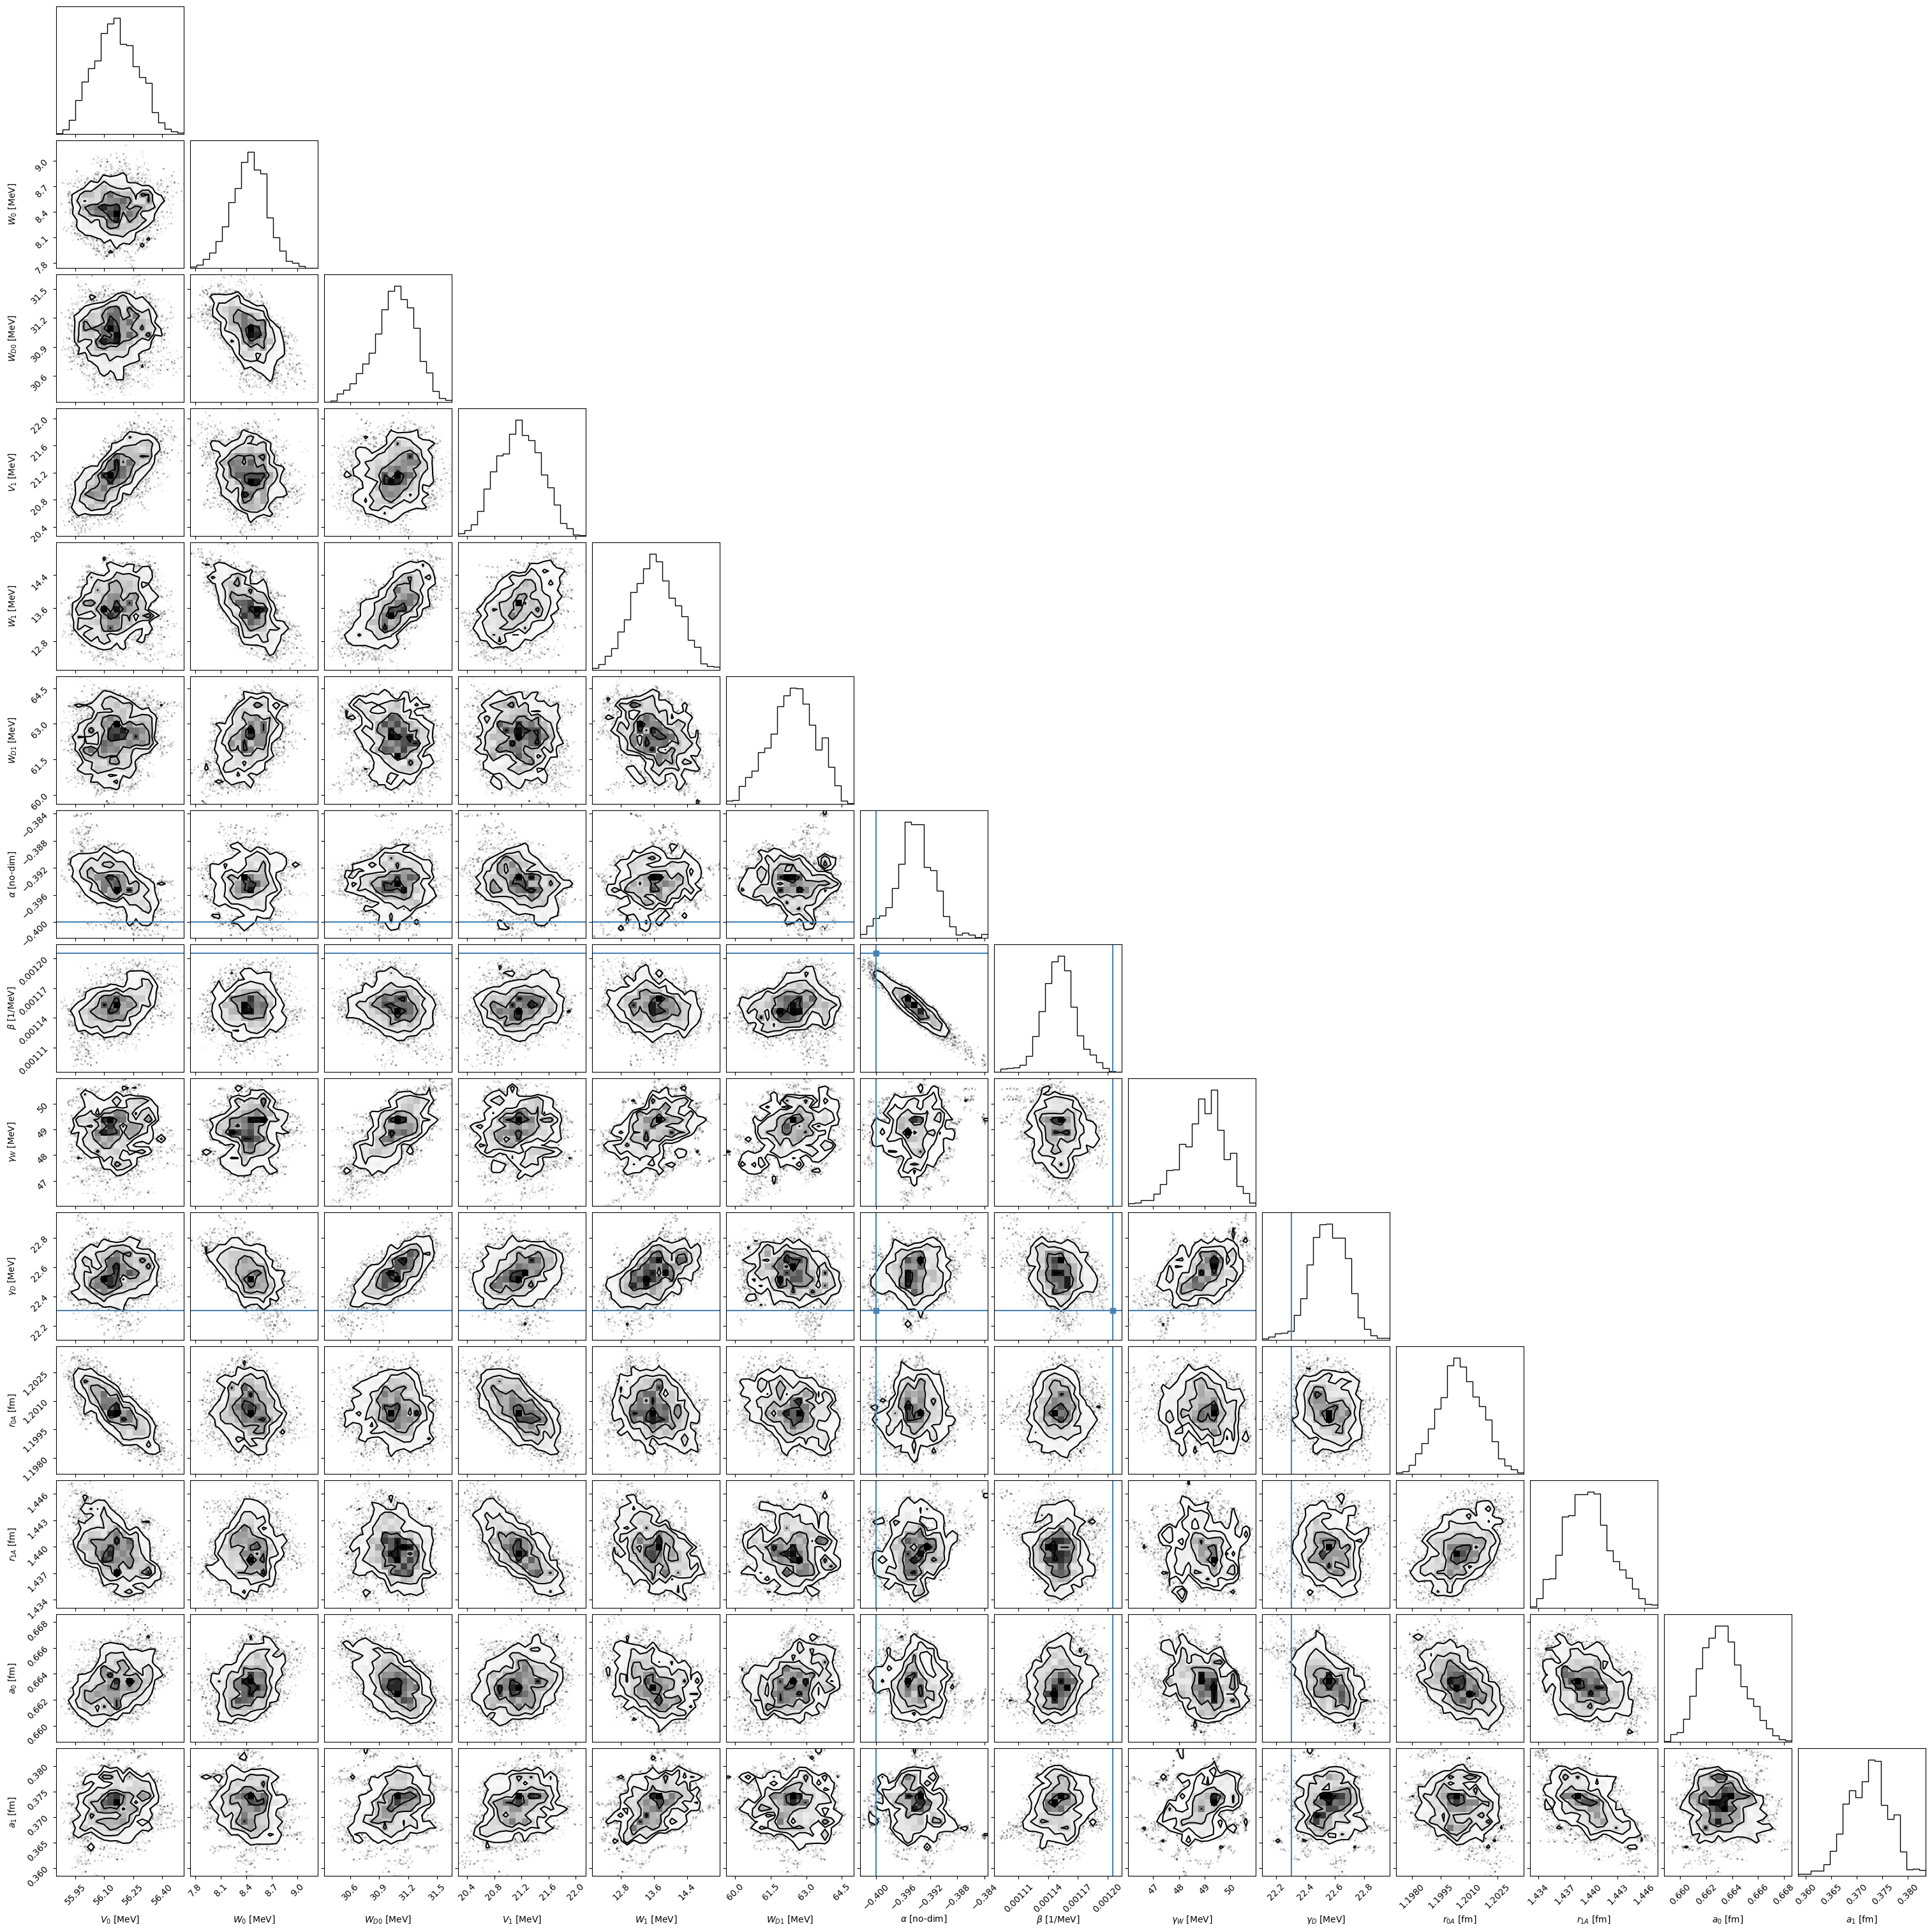

In [10]:
c = corner(
    x[idxs,:], labels=[f"${p.latex_name}$ [{p.unit}]" for p in elm.elm.params], truths=walker.model_sample_conf.starting_location,
)